# Interpolación de Newton vía diferencias divididas

Para n+1 puntos experimentales se tiene:

$$
P_{n} = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1)+ ... + a_n(x-x_0)(x-x_1)...(x-x_{n-1})
$$
$$
P_{n} = f[x_0] + \sum_{i=1}^{n} f[x_0,x_1,...,x_i] \prod_{j=0}^{i-1} (x-x_j)
$$

#                                          DIFERENCIAS DIVIDIDAS

$$
f[x_{i},x_{j}]= \frac{y_{j}-y_{i}}{x_{j}-x_{i}}
$$

# ERROR DE LA INTERPOLACIÓN

$$
R_{n}(x)=f[x,x_{0},x_{1},...,x_{n}](x-x_{0})(x-x_{1})...(x-x_{n})
$$

$$
R_{n}(x)= \frac{f^{n+1}(\xi)}{(n+1)!} \prod_{i=0}^{n} (x-x_{i})
$$

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
x_list=[2,5,7,10,12,15]
y_list=[10,13,17,22,30,35]

F=np.zeros((len(x_list),len(x_list)))
F[0][0]=y_list[0]
F[1][0]=y_list[1]
F[2][0]=y_list[2]
F[3][0]=y_list[3]
F[4][0]=y_list[4]
for i in range(0,len(x_list)):
    for j in range(1,i+1):
        F[i][j]=(F[i][j-1] - F[i-1][j-1])/(x_list[i] - x_list[i-j])
        

In [125]:
F

array([[ 1.00000000e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.30000000e+01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.70000000e+01,  2.00000000e+00,  2.00000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.20000000e+01,  1.66666667e+00, -6.66666667e-02,
        -3.33333333e-02,  0.00000000e+00,  0.00000000e+00],
       [ 3.00000000e+01,  4.00000000e+00,  4.66666667e-01,
         7.61904762e-02,  1.09523810e-02,  0.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+01, -2.80000000e+00,
        -4.08333333e-01, -4.84523810e-02, -4.56959707e-03]])

In [126]:
def IntNewton(x_list,y_list,x):
    suma=y_list[0]
    for k in range(1,len(x_list)):
        prod=1
        for l in range(0,k):
            prod=prod*(x-x_list[l])
        suma=suma + F[k][k]*prod
    return(suma)

In [127]:
IntNewton(x_list,y_list,1.3)

17.996743909615386

In [128]:
x_array=np.linspace(min(x_list),max(x_list),100)
y_array2=[]

In [129]:
for n in range(0,len(x_array)):
    y_array2.append(IntNewton(x_list,y_list,x_array[n]))

In [130]:
print(len(x_array))
#print(len(y_array))
#print(y_array)
print(len(y_array2))

100
100


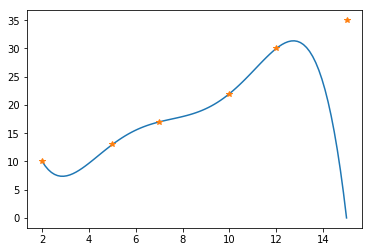

In [132]:
plt.plot(x_array,y_array2)
plt.plot(x_list,y_list,"*")
plt.show()